In [60]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import warnings

In [61]:
data=pd.read_csv("C:\\Users\\DELL\\heart.csv")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [70]:
X = data[['age','sex']] 
y = data['chol'] 

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [73]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [74]:
y_pred = knn_model.predict(X_test)

In [75]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 0.00%


In [76]:
h = .02
x_min, x_max = X['age'].min() - 1, X['age'].max() + 1
y_min, y_max = X['sex'].min() - 1, X['sex'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [77]:
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\DELL\OneDrive\Documents\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


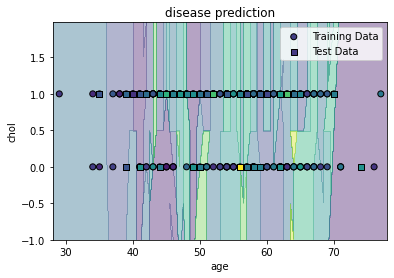

In [78]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train['age'], X_train['sex'], c=y_train, marker='o', edgecolor='k', label='Training Data')
plt.scatter(X_test['age'], X_test['sex'], c=y_test, marker='s', edgecolor='k', label='Test Data')

plt.xlabel('age')
plt.ylabel('chol')
plt.title('disease prediction')
plt.legend()
plt.show()